In [13]:
from skimage import filters

threshold = filters.threshold_otsu(blurred_image)
print(threshold)

0.48307635389561887


Using numpy arrays, we can apply the threshold by applying the >= operato

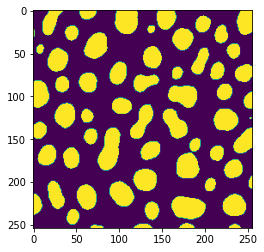

In [16]:
thresholded_image = blurred_image >= threshold

plt.imshow(thresholded_image)
plt.show()

# Connected component labeling / analysis

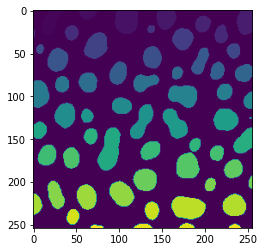

In [18]:
from skimage import measure

# run connected components analysis
label_image = measure.label(thresholded_image)

plt.imshow(label_image)
plt.show()

# Measurements / feature extraction
To read out properties from regions, we use the regionprops_table function:

In [28]:
from skimage import measure

# analyse objects
properties = measure.regionprops(label_image, intensity_image=image)

The results are stored as `RegionProps` objects, unfortunately.

In [29]:
properties[0:5]

We can reorganize the measurements into a dictionary containing arrays.

In [30]:
statistics = {
    "area": [entry.area for entry in properties],
    "mean": [entry.mean_intensity for entry in properties],
}

statistics

{'area': [422,
  182,
  661,
  437,
  476,
  277,
  259,
  219,
  67,
  19,
  486,
  630,
  221,
  78,
  449,
  516,
  390,
  419,
  267,
  353,
  151,
  400,
  426,
  246,
  503,
  278,
  681,
  176,
  358,
  544,
  597,
  181,
  629,
  596,
  5,
  263,
  899,
  476,
  233,
  164,
  394,
  411,
  235,
  375,
  654,
  376,
  579,
  64,
  161,
  457,
  625,
  535,
  205,
  562,
  845,
  280,
  211,
  78,
  86,
  51,
  46],
 'mean': [192.3791469194313,
  180.13186813186815,
  205.2163388804841,
  216.5858123569794,
  212.30252100840337,
  206.4693140794224,
  178.007722007722,
  191.59817351598173,
  167.52238805970148,
  155.3684210526316,
  190.94650205761317,
  173.6,
  197.93665158371041,
  173.12820512820514,
  208.76614699331847,
  194.4031007751938,
  180.77948717948718,
  196.84964200477327,
  200.95880149812734,
  189.77903682719545,
  186.2251655629139,
  187.96,
  201.57746478873239,
  182.1138211382114,
  198.64811133200794,
  190.18705035971223,
  198.30837004405285,
  195.2

In [34]:
from skimage import measure

# analyse objects
table = measure.regionprops_table(label_image, intensity_image=image,
                                  properties=('area', 'mean_intensity'))

# show table
table

{'area': array([422, 182, 661, 437, 476, 277, 259, 219,  67,  19, 486, 630, 221,
         78, 449, 516, 390, 419, 267, 353, 151, 400, 426, 246, 503, 278,
        681, 176, 358, 544, 597, 181, 629, 596,   5, 263, 899, 476, 233,
        164, 394, 411, 235, 375, 654, 376, 579,  64, 161, 457, 625, 535,
        205, 562, 845, 280, 211,  78,  86,  51,  46]),
 'mean_intensity': array([192.37914692, 180.13186813, 205.21633888, 216.58581236,
        212.30252101, 206.46931408, 178.00772201, 191.59817352,
        167.52238806, 155.36842105, 190.94650206, 173.6       ,
        197.93665158, 173.12820513, 208.76614699, 194.40310078,
        180.77948718, 196.849642  , 200.9588015 , 189.77903683,
        186.22516556, 187.96      , 201.57746479, 182.11382114,
        198.64811133, 190.18705036, 198.30837004, 195.27272727,
        197.7877095 , 198.45588235, 190.95477387, 184.8839779 ,
        193.66613672, 210.06711409, 161.6       , 190.02281369,
        198.29143493, 204.92436975, 193.16738197, 1

We can access this table like a dictionary containing arrays, e.g. to derive the mean of the colum "area":

In [36]:
import numpy as np

# measure mean area
np.mean(table['area'])

358.42622950819674

# Exercises
Analyse the loaded blobs image. 

* How many objects are in it?

* How large is the largest object?

* What are mean and standard deviation of the image?

* What are mean and standard deviation of the segmented objects?